<a href="https://colab.research.google.com/github/jane560/Gap-Reduce/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 구글 연결 및 import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.chdir("/content/drive/MyDrive/project")
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1fKYCwGVe4LxLSxWe1WPEckRFTq_shO-W/project'

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
df = pd.read_csv('ERP 입력.csv', encoding = 'utf8') #실제 생산값
print(df)

             행 레이블       일자   합계 : 수량  합계 : 노무시간  합계 : 생산직인원    실제 직접 노무비
0     1229331C6038    05/10        24        NaN         NaN          NaN
1              NaN    05/18        48        NaN         NaN          NaN
2              NaN    06/17        48        NaN         NaN          NaN
3              NaN    07/05        24        NaN         NaN          NaN
4              NaN    07/26        48        NaN         NaN          NaN
...            ...      ...       ...        ...         ...          ...
998            NaN    01/19     22680        NaN         NaN     0.000000
999   5342069B7308    01/21     53840        NaN         NaN     0.000000
1000           NaN    01/28     24000        NaN         NaN     0.000000
1001       (비어 있음)  (비어 있음)  31875794     4480.0         NaN     0.000000
1002           총합계      NaN  63135751     8971.0      4817.0  9411.196638

[1003 rows x 6 columns]


In [ ]:
import pandas as pd
df1 = pd.read_csv('원가 산정.csv', encoding = 'utf8') #예측 생산량
print(df1)

               품번  원가산정시 생산인원(명/day)  원가 산정시 생산수량(ea/day)  생산량(hour)  노무 시간  \
0    1229331C6038                  5                 6000        750      8   
1    2021231A8800                  8                 2200        275      8   
2    2021931A6412                  6                 2500        313      8   
3    2021931A8314                 10                 2000        250      8   
4    2021931E7146                 10                 6000        750      8   
..            ...                ...                  ...        ...    ...   
214  5082028D6626                  3                15000       1875      8   
215  5087228F4605                  3                15000       1875      8   
216  5087228F6613                  3                15000       1875      8   
217  5087228X4605                  3                15000       1875      8   
218  5087228X6613                  3                15000       1875      8   

    공장구분   거래처구분           제품구분   개당 직접 노무비  
0    

### 전처리

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   행 레이블       223 non-null    object 
 1   일자          1001 non-null   object 
 2   합계 : 수량     1003 non-null   int64  
 3   합계 : 노무시간   725 non-null    float64
 4   합계 : 생산직인원  724 non-null    float64
 5   실제 직접 노무비   996 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 47.1+ KB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   품번                   219 non-null    object 
 1   원가산정시 생산인원(명/day)    219 non-null    float64
 2   원가 산정시 생산수량(ea/day)  219 non-null    object 
 3   공장구분                 219 non-null    object 
 4   거래처구분                219 non-null    object 
 5   제품구분                 219 non-null    object 
 6   개당 직접 노무비            219 non-null    float64
dtypes: float64(2), object(5)
memory usage: 64.9+ KB


***컬럼명 변경***

품번: item

노무 인원: worker

생산량: production(hour)

노무 시간: hour

노무비: cost

In [ ]:
df1.columns = ['item','worker','production(day)','production(hour)','hour','공장구분','거래처구분','제품구분','cost']

ValueError: ignored

In [ ]:
df1.info()

In [ ]:
df.columns = ['num','date','production(hour)','hour','worker','cost']

In [ ]:
df.info()

In [ ]:
newdf = df.dropna()

In [ ]:
newdf1 = df1.dropna()

In [ ]:
newdf

In [ ]:
newdf1

(아직 안함함)데이터 선택 시각화 하면면 좋을을 것것 같아
### 품목이 많은 갯수로 나열해보기 * ranking + 그래프

### Scaling

### Modeling: 다중선형회귀분석

순서: 데이터선택 -> 훈련/테스트 데이터 분류 -> 모델링 -> 평가

modeling(1) - 예측 생산량 관련 회귀분석

In [ ]:
#분석 데이터 준비
x_data = newdf1[["worker","hour","cost"]]
target = newdf1[["production(hour)"]]

In [ ]:
x_data

In [ ]:
target

In [ ]:
import numpy as np
import statsmodels.api as sm

x_data1 = sm.add_constant(x_data, has_constant="add")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


모델 평가

In [ ]:
multi_model = sm.OLS(target, x_data1)
fitted_multi_model1 = multi_model.fit()
fitted_multi_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       production(hour)   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     20.36
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           7.90e-09
Time:                        07:07:12   Log-Likelihood:                -1851.3
No. Observations:                 219   AIC:                             3709.
Df Residuals:                     216   BIC:                             3719.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.9385      3.686      5.953      0.000      14.674      29.203
worker        37.0453     34.046      1.088      0.278     -30.060     104.150
hour         175.5077     29.484      5.953      0.000     117.394     233.621
cost          -2.5229      0.402     -6.270      0.000      -3.316      -1.730
==============================================================================
Omnibus:                      126.512   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              501.519
Skew:                           2.521   Prob(JB):                    1.25e-109
Kurtosis:                       8.436   Cond. No.                     1.70e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.89e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### modeling(2) - 실제 생산값 회귀분석

In [ ]:
x_data = newdf[["worker","hour","cost"]]
target = newdf[["production(hour)"]]

In [ ]:
x_data = sm.add_constant(x_data, has_constant="add")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


모델링 평가

In [ ]:
multi_model = sm.OLS(target, x_data)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       production(hour)   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     18.16
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           3.02e-10
Time:                        07:07:37   Log-Likelihood:                -1700.3
No. Observations:                 171   AIC:                             3409.
Df Residuals:                     167   BIC:                             3421.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.0362   1332.051      0.029      0.977   -2590.793    2668.865
worker       338.2685    189.246      1.787      0.076     -35.354     711.891
hour         847.5964    164.914      5.140      0.000     522.011    1173.181
cost          -4.2658      0.871     -4.899      0.000      -5.985      -2.547
==============================================================================
Omnibus:                      146.029   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1610.904
Skew:                           3.257   Prob(JB):                         0.00
Kurtosis:                      16.552   Cond. No.                     1.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### modeling(3) - 예측값 회귀분석과 실제값 회귀분석 간의 차이 확인
(그래프 그리기)

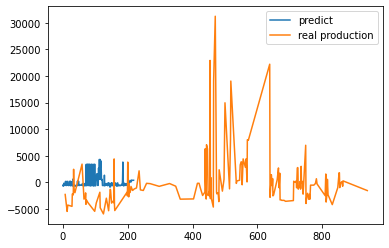

In [ ]:
import matplotlib.pyplot as plt
fitted_multi_model1.resid.plot(label = "predict")
fitted_multi_model.resid.plot(label = "real production")
plt.legend()

3-1. 차이 회귀분석

다중공선성 평가(상관관계 분석) - 필요없을지도도..

In [ ]:
x_data1.corr()

,worker,hour,cost
worker,1.000000,NaN,0.350884
hour,NaN,NaN,NaN
cost,0.350884,NaN,1.000000


In [ ]:
x_data.corr()

,worker,hour,cost
worker,1.000000,0.261251,0.027438
hour,0.261251,1.000000,0.129413
cost,0.027438,0.129413,1.000000


In [ ]:
x_data['const']

7      1.0
12     1.0
13     1.0
15     1.0
28     1.0
      ... 
860    1.0
862    1.0
863    1.0
864    1.0
939    1.0
Name: const, Length: 171, dtype: float64

In [ ]:
x_data = x_data.drop(['const'],axis=1)

In [ ]:
x_data

,worker,hour,cost
7,8.0,2.0,366.666667
12,6.0,7.0,360.937500
13,6.0,8.0,343.750000
15,8.0,8.0,200.000000
28,8.0,7.0,729.166667
...,...,...,...
860,5.0,4.0,55.000000
862,5.0,4.0,55.220884
863,1.0,1.0,66.105769
864,5.0,4.0,53.140097


In [ ]:
x_data1 = x_data1.drop(['const'],axis=1)

In [ ]:
x_data1

,worker,hour,cost
0,5,8,91.666667
1,8,8,400.000000
2,6,8,264.000000
3,10,8,550.000000
4,10,8,183.333333
...,...,...,...
214,3,8,22.000000
215,3,8,22.000000
216,3,8,22.000000
217,3,8,22.000000


3-2. 정확도 평가